Step 1: Import Libraries

In [1]:
!pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.decomposition import PCA
import zipfile
import joblib
import umap


Step 2: Load and Unzip the Dataset

In [3]:
# Unzipping the dataset
with zipfile.ZipFile('/content/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

# Load the CSV file into a DataFrame
df = pd.read_csv('/content/Copy of sonar data.csv', header=None)

Step 3: Data Inspection and Cleaning

In [4]:
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Check the distribution of target classes
print(df[60].value_counts())

# Separate numeric columns for filling missing values
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Dropping rows with missing values in non-numeric columns if any
df.dropna(inplace=True)

# Handle outliers or incorrect data entries in numeric columns
from scipy import stats
df[numeric_cols] = df[numeric_cols][(np.abs(stats.zscore(df[numeric_cols])) < 3).all(axis=1)]

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

Step 4: Data Visualization

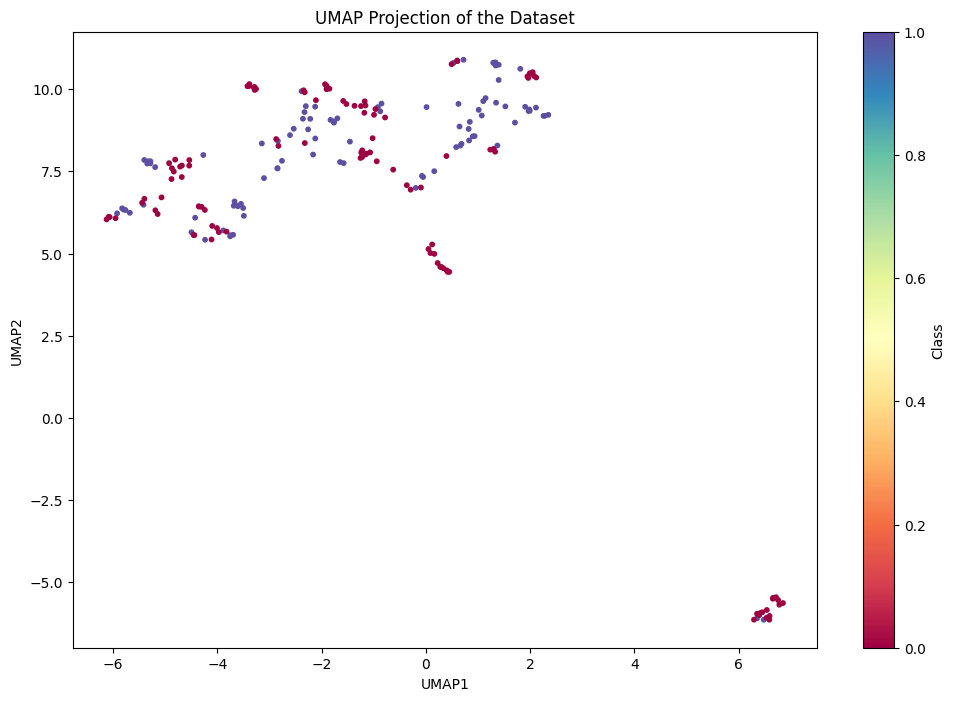

In [5]:
# Convert labels to numerical values using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[60] = le.fit_transform(df[60])

# Fill missing values in all columns (including non-numeric if any)
df = df.fillna(method='ffill')

# Using UMAP for advanced visualization of high-dimensional data
reducer = umap.UMAP()
umap_embedding = reducer.fit_transform(df.drop(60, axis=1))
plt.figure(figsize=(12, 8))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], c=df[60], cmap='Spectral', s=10)
plt.title('UMAP Projection of the Dataset')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.colorbar(label='Class')
plt.show()

Step 5: Data Preprocessing

In [6]:
# Separate features and target
X = df.drop(60, axis=1)
y = df[60]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Step 6: Define and Train Multiple Models

In [27]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

# Initialize the results dictionary
results = {name: {} for name in models}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name]['accuracy'] = accuracy_score(y_test, y_pred)
    results[name]['precision'] = precision_score(y_test, y_pred, average='weighted')
    results[name]['recall'] = recall_score(y_test, y_pred, average='weighted')
    results[name]['f1'] = f1_score(y_test, y_pred, average='weighted')

# Print the results
for name, metrics in results.items():
    print(f"{name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")


[LightGBM] [Info] Number of positive: 81, number of negative: 85
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2962
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487952 -> initscore=-0.048202
[LightGBM] [Info] Start training from score -0.048202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

Step 7: Evaluate the Best Model

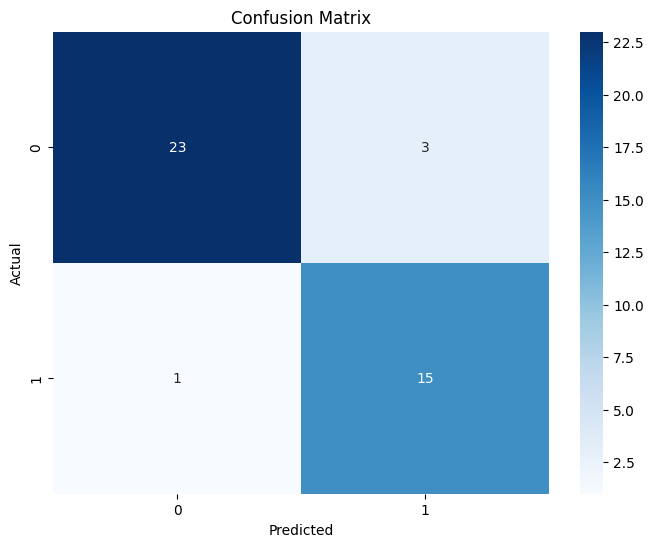

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.83      0.94      0.88        16

    accuracy                           0.90        42
   macro avg       0.90      0.91      0.90        42
weighted avg       0.91      0.90      0.91        42

Precision: 0.83
Recall: 0.94
F1 Score: 0.88


In [28]:
# Find the best model based on a chosen metric
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
best_model = models[best_model_name]

# Evaluate the best model
y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

# Precision, Recall, and F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Step 8: Feature Importance Visualization (for tree-based models)

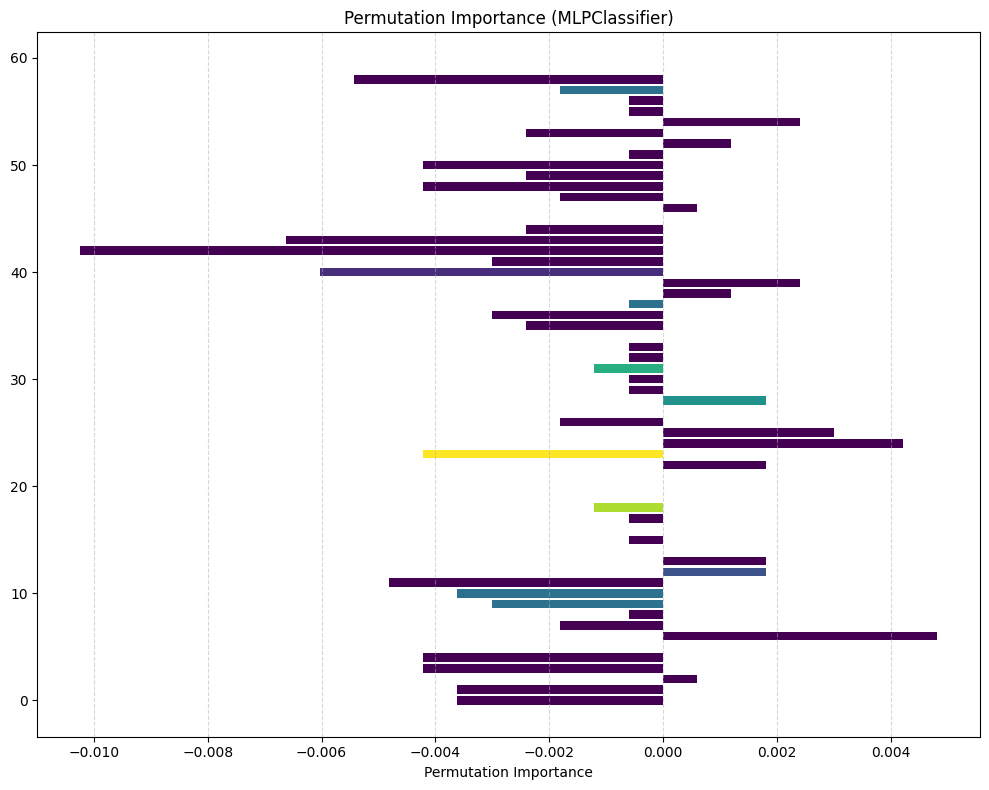

In [9]:
import matplotlib
from sklearn.inspection import permutation_importance
# Compute permutation importance
result = permutation_importance(best_model, X_train, y_train, n_repeats=10, random_state=42)

# Extract feature importances
sorted_idx = result.importances_mean.argsort()

# Plot permutation importance with enhanced visuals
fig, ax = plt.subplots(figsize=(10, 8))

# Use the colormap directly from matplotlib
cmap = matplotlib.colormaps['viridis']

# Plot horizontal bar chart
bar_colors = cmap(result.importances_mean / np.max(result.importances_mean))
ax.barh(df.columns[:-1][sorted_idx], result.importances_mean[sorted_idx], color=bar_colors)

ax.set_xlabel("Permutation Importance")
ax.set_title("Permutation Importance (MLPClassifier)")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)  # Add grid lines for better readability
plt.tight_layout()  # Ensure tight layout
plt.show()


Step 9: Visualize the Performance of All Models

<Figure size 1400x800 with 0 Axes>

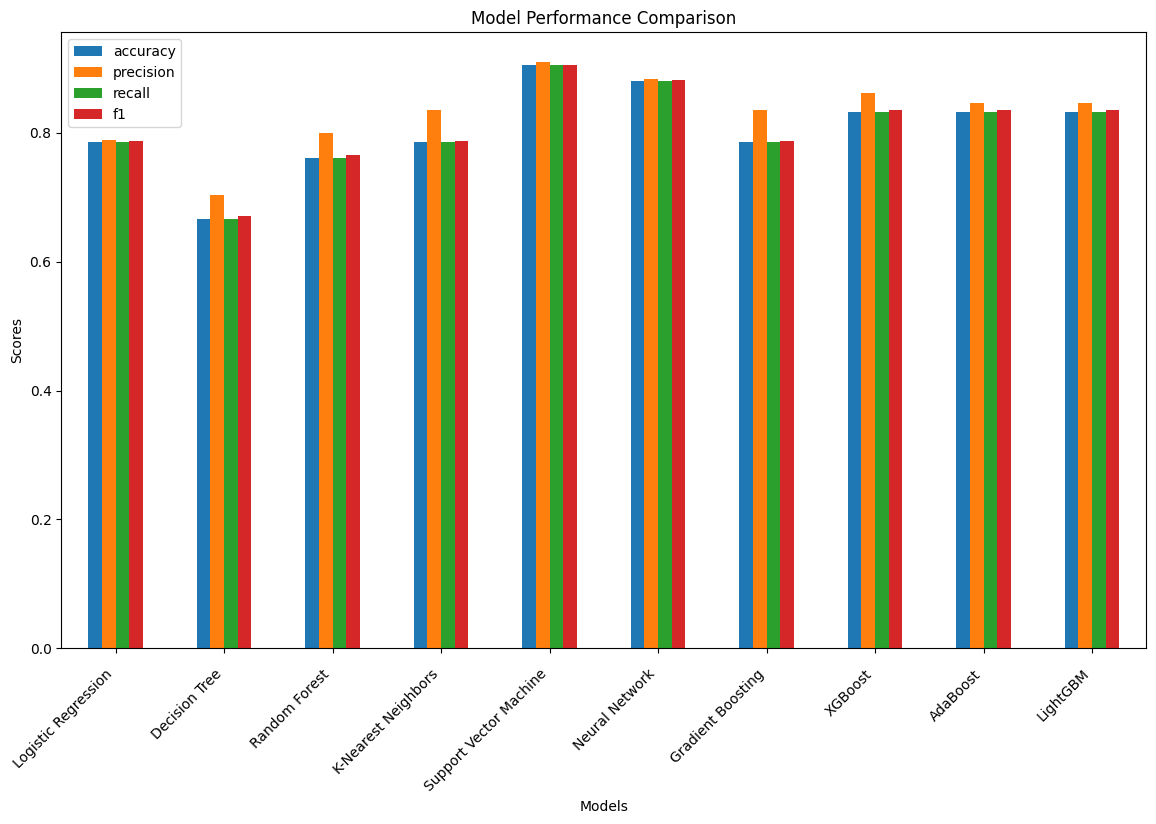

In [16]:
# Create a DataFrame to store the results
results_df = pd.DataFrame(results).T

# Plot the performance of all models
plt.figure(figsize=(14, 8))
ax = results_df[['accuracy', 'precision', 'recall', 'f1']].plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend(loc='best')

# Display model names outside the graph
ax.set_xticklabels(results_df.index, rotation=45, ha="right")
ax.tick_params(axis='x', pad=10)

plt.show()

Step 10: Hyperparameter Tuning for the Models


In [25]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {
        'C': np.logspace(-4, 4, 20),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    },
    "Decision Tree": {
        'max_depth': [None] + list(range(5, 31, 5)),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11)
    },
    "Random Forest": {
        'n_estimators': [100, 200, 300],
        'max_depth': [None] + list(range(5, 31, 5)),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11)
    },
    "K-Nearest Neighbors": {
        'n_neighbors': range(1, 31),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    "Support Vector Machine": {
        'C': np.logspace(-3, 3, 7),
        'kernel': ['rbf', 'poly', 'sigmoid'],
        'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 5))
    },
    "Neural Network": {
        'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
        'activation': ['tanh', 'relu'],
        'alpha': np.logspace(-5, 3, 5),
        'learning_rate': ['constant', 'adaptive']
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': range(3, 10),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11)
    },
    "XGBoost": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': range(3, 10),
        'min_child_weight': range(1, 6),
        'subsample': [0.6, 0.8, 1.0]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    "LightGBM": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': range(3, 10),
        'num_leaves': [31, 63, 127],
        'subsample': [0.6, 0.8, 1.0]
    }
}

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Neural Network": MLPClassifier(max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "LightGBM": LGBMClassifier()
}

# Perform RandomizedSearchCV for each model
results = {}
for name, model in models.items():
    print(f"\nTuning {name}...")

    # Use RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grids[name],
                                       n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)

    # Fit the model
    random_search.fit(X_train_scaled, y_train)

    # Store the results
    results[name] = {
        'best_params': random_search.best_params_,
        'best_score': random_search.best_score_,
        'best_estimator': random_search.best_estimator_
    }

    # Predict on test set
    y_pred = random_search.predict(X_test_scaled)

    # Calculate and store metrics
    results[name]['test_accuracy'] = accuracy_score(y_test, y_pred)
    results[name]['classification_report'] = classification_report(y_test, y_pred)

# Print results
for name, result in results.items():
    print(f"\n{name}:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Cross-validation Score: {result['best_score']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])

# Identify the best model
best_model = max(results, key=lambda x: results[x]['test_accuracy'])
print(f"\nBest Model: {best_model}")
print(f"Best Model Test Accuracy: {results[best_model]['test_accuracy']:.4f}")


Tuning Logistic Regression...
Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Tuning Decision Tree...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Tuning Random Forest...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Tuning K-Nearest Neighbors...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Tuning Support Vector Machine...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Tuning Neural Network...
Fitting 5 folds for each of 80 candidates, totalling 400 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 80 is smaller than n_iter=100. Running 80 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Tuning Gradient Boosting...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Tuning XGBoost...
Fitting 5 folds for each of 100 candidates, totalling 500 fits

Tuning AdaBoost...
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Tuning LightGBM...
Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 81, number of negative: 85
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2962
[LightGBM] [Info] Number of data points in the train set: 166, number of used features: 60
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487952 -> initscore=-0.048202
[LightGBM] [Info] Start training from score -0.048202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

Step 11: Predicting Using the Best Model


Comparison of Actual vs Predicted Labels:
  Actual Predicted
0      M         M
1      R         R
2      R         R
3      R         M
4      M         M
5      R         R
6      M         M
7      M         M
8      R         R
9      M         M

SVM Model Performance Metrics:
Accuracy: 0.9048
Precision: 0.9107
Recall: 0.9048
F1 Score: 0.9057


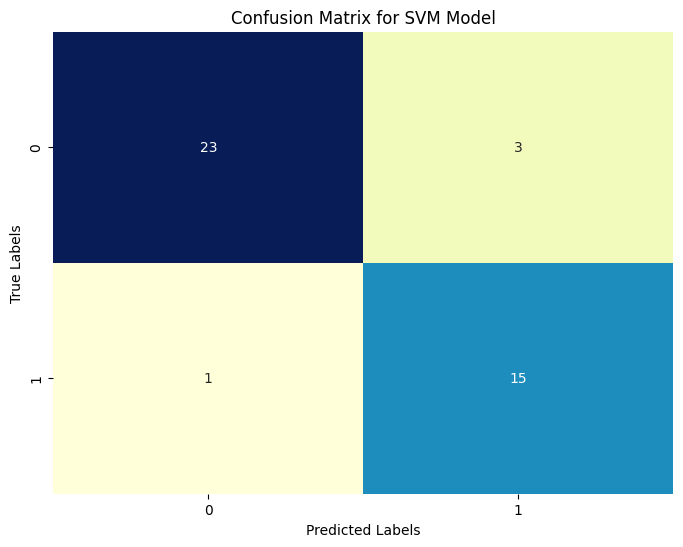

In [32]:
# Predict using the SVM model
y_pred = best_model.predict(X_test)

# Convert numerical predictions back to original labels
predicted_labels = le.inverse_transform(y_pred)
actual_labels = le.inverse_transform(y_test)

# Compare predicted vs actual labels
prediction_comparison = pd.DataFrame({'Actual': actual_labels, 'Predicted': predicted_labels})
print("\nComparison of Actual vs Predicted Labels:")
print(prediction_comparison.head(10))

# Evaluate the SVM model's performance
svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred, average='weighted')
svm_recall = recall_score(y_test, y_pred, average='weighted')
svm_f1 = f1_score(y_test, y_pred, average='weighted')

print("\nSVM Model Performance Metrics:")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")

# Confusion Matrix with enhanced visualization
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='YlGnBu', fmt='d', cbar=False)  # Using a different colormap 'YlGnBu'
plt.title('Confusion Matrix for SVM Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()